In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


In [ ]:
!pip install finance-datareader

In [8]:
import FinanceDataReader as fdr

In [ ]:
df = fdr.DataReader('KS11', '2018-01-01', '2022-03-20')
df.tail()

In [18]:
df.head(2)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,2479.65,2474.86,2481.02,2465.94,262200000.0,0.0049
2018-01-03,2486.35,2484.63,2493.40,2481.91,331100000.0,0.0027


In [17]:
scaler = MinMaxScaler()
price = scaler.fit_transform(df)
price[:3]

array([[0.55316443, 0.54637058, 0.53590503, 0.55307353, 0.01712002,
        0.52266039],
       [0.55679081, 0.55170644, 0.54278537, 0.56167801, 0.03829722,
        0.5097116 ],
       [0.54602532, 0.56146608, 0.54784281, 0.55334831, 0.03913939,
        0.44673337]])

In [19]:
window_size = 10
X = []
Y = []

for i in range(len(price) - window_size):
  X.append([price[i+j] for j in range(window_size)])
  Y.append(price[window_size + i][0])

In [20]:
X = np.array(X)
Y = np.array(Y)

In [21]:
X.shape

(1026, 10, 6)

In [22]:
Y.shape

(1026,)

In [23]:
tt_split = 800

x_train = X[:tt_split]
y_train = Y[:tt_split]

x_test = X[tt_split:]
y_test = Y[tt_split:]

In [24]:
# 3차원입력 : (n_sample, time_steps, n_features)

# x_train = np.reshape(x_train, (2000, 10, 1))
# x_test = np.reshape(x_test, (579, 10, 1))

x_train.shape

(800, 10, 6)

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(10, 6)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

In [26]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test))

In [28]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

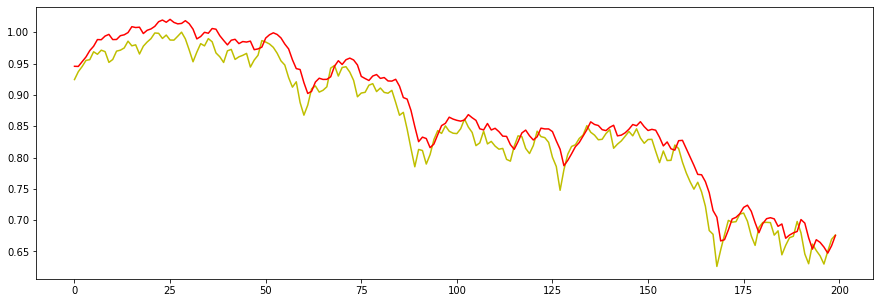

In [30]:
plt.figure(figsize=(15,5))

plt.plot(price[-200:,0], color='y')
plt.plot(x_test_pred[-200:], color='r')